### Recrystallization Fraction Estimation

##### Random Forest Regresssion Model

In [25]:
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv("Recryst_Dataset_2.csv")
df

,Temperature,Strain rate,Strain,Stress,Recrystallization,log(strain_rate),exp(Q/RT),Z
0,1193,0.001,0.181,190.500,0.044,-6.907755,1.223409,0.001223
1,1193,0.001,0.304,191.120,0.125,-6.907755,1.223409,0.001223
2,1193,0.001,0.402,183.030,0.287,-6.907755,1.223409,0.001223
3,1193,0.001,0.510,173.810,0.441,-6.907755,1.223409,0.001223
4,1193,0.001,0.608,167.420,0.588,-6.907755,1.223409,0.001223
...,...,...,...,...,...,...,...,...
212,1313,1.000,0.800,301.504,0.625,0.000000,1.201070,1.201070
213,1313,1.000,0.892,298.665,0.721,0.000000,1.201070,1.201070
214,1313,1.000,0.995,295.465,0.801,0.000000,1.201070,1.201070
215,1313,1.000,1.108,292.523,0.868,0.000000,1.201070,1.201070


In [27]:
#remove the null value raw
df1 = df.dropna(axis=0)
df1.isnull().sum()

Temperature          0
Strain rate          0
Strain               0
Stress               0
Recrystallization    0
log(strain_rate)     0
exp(Q/RT)            0
Z                    0
dtype: int64

In [28]:
data_rf = df1.drop(['Recrystallization','Strain'],axis = 1)
data_rf.head()

,Temperature,Strain rate,Stress,log(strain_rate),exp(Q/RT),Z
0,1193,0.001,190.50,-6.907755,1.223409,0.001223
1,1193,0.001,191.12,-6.907755,1.223409,0.001223
2,1193,0.001,183.03,-6.907755,1.223409,0.001223
3,1193,0.001,173.81,-6.907755,1.223409,0.001223
4,1193,0.001,167.42,-6.907755,1.223409,0.001223


In [29]:
target_rf = df1.Recrystallization
target_rf.head()

0    0.044
1    0.125
2    0.287
3    0.441
4    0.588
Name: Recrystallization, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data_rf,target_rf,test_size=0.2)

In [31]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=8)

In [32]:
model_rf.fit(data_train,target_train)

RandomForestRegressor(n_estimators=8)

In [33]:
model_rf.score(data_test,target_test)

0.7024516160814406

In [34]:
arr = np.arange(1, 101, 2)
pred = np.array([])
for i in arr:
    model_rf = RandomForestRegressor(n_estimators=i)
    model_rf.fit(data_train,target_train)
    temp = model_rf.score(data_test,target_test)
    pred = np.append(pred,temp)
pred = np.column_stack((pred,arr))
pred = pd.DataFrame(pred,columns=['Score', 'Number of Trees'])
pred.head()

,Score,Number of Trees
0,0.358809,1.0
1,0.371616,3.0
2,0.601438,5.0
3,0.721101,7.0
4,0.664692,9.0


[Text(0.5, 1.0, 'Predicted score')]

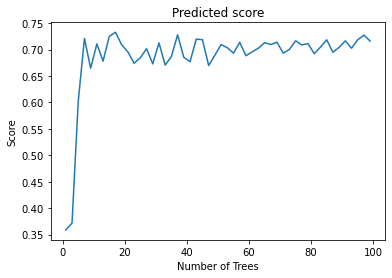

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = 'Number of Trees',y = 'Score',data = pred,palette = 'dark').set(title="Predicted score")

In [36]:
importances = pd.DataFrame({'feature':data_train.columns,'importance':np.round(model_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Stress,0.829
Z,0.084
exp(Q/RT),0.034
Temperature,0.032
log(strain_rate),0.012
Strain rate,0.010


In [ ]:
from sklearn.tree import export_graphviz
estimator = model_rf.estimators_[1]
export_graphviz(estimator, 'tree.dot', feature_names = data_train.columns)

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

In [ ]:
# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [ ]:
data_1193= pd.read_csv("1193_all.csv").to_numpy()
data_1223= pd.read_csv("1223_all.csv").to_numpy()
data_1253= pd.read_csv("1253_all.csv").to_numpy()
data_1283= pd.read_csv("1283_all.csv").to_numpy()
data_1313= pd.read_csv("1313_all.csv").to_numpy()

In [ ]:
#predicted recrystallization fraction for T = 1193K
pred = np.array([])
for i in data_1193:
    temp = model_rf.predict([i])
    pred = np.append(pred,temp) 
pred_1193 = np.column_stack((data_1193,pred))

In [ ]:
pred_1193 = pd.DataFrame(pred_1193,columns=['Temperature', 'Strain_rate','Strain','Stress','Pred_recry'])
pred_1193.to_csv("pred_1193.csv",index=False)

In [ ]:
#predicted recrystallization fraction for T = 1223K
pred = np.array([])
for i in data_1223:
    temp = model_rf.predict([i])
    pred = np.append(pred,temp) 
pred_1223 = np.column_stack((data_1223,pred))

In [ ]:
pred_1223 = pd.DataFrame(pred_1223,columns=['Temperature', 'Strain_rate','Strain','Stress','Pred_recry'])
pred_1223.to_csv("pred_1223.csv",index=False)

In [ ]:
#predicted recrystallization fraction for T = 1253K
pred = np.array([])
for i in data_1253:
    temp = model_rf.predict([i])
    pred = np.append(pred,temp) 
pred_1253 = np.column_stack((data_1253,pred))

In [ ]:
pred_1253 = pd.DataFrame(pred_1253,columns=['Temperature', 'Strain_rate','Strain','Stress','Pred_recry'])
pred_1253.to_csv("pred_1253.csv",index=False)

In [ ]:
#predicted recrystallization fraction for T = 1283K
pred = np.array([])
for i in data_1283:
    temp = model_rf.predict([i])
    pred = np.append(pred,temp) 
pred_1283 = np.column_stack((data_1283,pred))

In [ ]:
pred_1283 = pd.DataFrame(pred_1283,columns=['Temperature', 'Strain_rate','Strain','Stress','Pred_recry'])
pred_1283.to_csv("pred_1283.csv",index=False)

In [ ]:
#predicted recrystallization fraction for T = 1313K
pred = np.array([])
for i in data_1313:
    temp = model_rf.predict([i])
    pred = np.append(pred,temp) 
pred_1313 = np.column_stack((data_1313,pred))

In [ ]:
pred_1313 = pd.DataFrame(pred_1313,columns=['Temperature', 'Strain_rate','Strain','Stress','Pred_recry'])
pred_1313.to_csv("pred_1313.csv",index=False)

In [ ]:
#predicted recrystallization fraction for T = 1313K
data_1253_avg= pd.read_csv("1253_all_averaging.csv").to_numpy()
pred = np.array([])
for i in data_1253_avg:
    temp = model_rf.predict([i])
    pred = np.append(pred,temp) 
pred_1253_avg = np.column_stack((data_1253_avg,pred))

In [ ]:
pred_1253_avg = pd.DataFrame(pred_1253_avg,columns=['Temperature', 'Strain_rate','Strain','Stress','Pred_recry'])
pred_1253_avg.to_csv("pred_1253_avg.csv",index=False)

In [ ]:
df_1193 = df1[df1['Temperature'] == 1193]
df_1223 = df1[df1['Temperature'] == 1223]
df_1253 = df1[df1['Temperature'] == 1253]
df_1283 = df1[df1['Temperature'] == 1283]
df_1313 = df1[df1['Temperature'] == 1313]

In [ ]:
pred_1193 = pred_1193[pred_1193['Strain']>=0.1]
pred_1223 = pred_1223[pred_1223['Strain']>=0.1]
pred_1253 = pred_1253[pred_1253['Strain']>=0.1]
pred_1283 = pred_1283[pred_1283['Strain']>=0.1]
pred_1313 = pred_1313[pred_1313['Strain']>=0.1]

In [ ]:
#plotting libraries 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#comparison plot between experiment and predicted data
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(6, 5), tight_layout=True)
sns.scatterplot(x = 'Strain',y = 'Recrystallization',data = df_1193,hue = 'Strain rate',palette = 'dark')
sns.lineplot(x = 'Strain',y = 'Pred_recry',data = pred_1193,hue = 'Strain_rate',palette = 'dark',legend = False)
plt.title("For T = 1193 K")

In [ ]:
#comparison plot between experiment and predicted data
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(6, 5), tight_layout=True)
sns.scatterplot(x = 'Strain',y = 'Recrystallization',data = df_1223,hue = 'Strain rate',palette = 'dark')
sns.lineplot(x = 'Strain',y = 'Pred_recry',data = pred_1223,hue = 'Strain_rate',palette = 'dark',legend = False)
plt.title("For T = 1223 K")

In [ ]:
#comparison plot between experiment and predicted data
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(6, 5), tight_layout=True)
sns.scatterplot(x = 'Strain',y = 'Recrystallization',data = df_1253,hue = 'Strain rate',palette = 'dark')
sns.lineplot(x = 'Strain',y = 'Pred_recry',data = pred_1253,hue = 'Strain_rate',palette = 'dark',legend = False)
plt.title("For T = 1253 K")

In [ ]:
#comparison plot between experiment and predicted data
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(6, 5), tight_layout=True)
sns.scatterplot(x = 'Strain',y = 'Recrystallization',data = df_1283,hue = 'Strain rate',palette = 'dark')
sns.lineplot(x = 'Strain',y = 'Pred_recry',data = pred_1283,hue = 'Strain_rate',palette = 'dark',legend = False)
plt.title("For T = 1283 K")

In [ ]:
#comparison plot between experiment and predicted data
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(6, 5), tight_layout=True)
sns.scatterplot(x = 'Strain',y = 'Recrystallization',data = df_1313,hue = 'Strain rate',palette = 'dark')
sns.lineplot(x = 'Strain',y = 'Pred_recry',data = pred_1313,hue = 'Strain_rate',palette = 'dark',legend = False)
plt.title("For T = 1313 K")